## Notebook one: Download and preprocess the COCO training images

In [0]:
!pip install Pillow # used to resize images

In [0]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import random
import shutil
import time
import IPython.display as display
import csv

from google.colab import drive
from PIL import Image
from sklearn.model_selection import train_test_split

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
# Starter code to download small files
# Use this to download your starter CSV in notebook one and two.
# Also use it to download your thumbnails.zip in notebook two.
def download_if_missing(url, target, extract=True):
  if os.path.exists(target):
    return target
  return tf.keras.utils.get_file(target, origin=url, extract=extract)

In [0]:
colab_root = "/content"

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
csv_path = os.path.join(colab_root, "starter.csv")
download_if_missing("https://storage.googleapis.com/applied-dl/mini-vqa/starter.csv",
                     csv_path)

9084928/9078552 [==============================] - 0s 0us/step


'/content/starter.csv'

In [0]:
!head $csv_path -n3 # take a look at a few rows

is the sky blue,yes,COCO_train2014_000000393221.jpg
is there snow on the mountains,yes,COCO_train2014_000000393221.jpg
is the window open,yes,COCO_train2014_000000393223.jpg


In [0]:
!wc -l $csv_path

140637 /content/starter.csv


In [0]:
!curl -L -O http://images.cocodataset.org/zips/train2014.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12.5G  100 12.5G    0     0  60.8M      0  0:03:31  0:03:31 --:--:-- 66.2M


In [0]:
! ls -lha

total 13G
drwxr-xr-x 1 root root 4.0K Nov 25 21:04 .
drwxr-xr-x 1 root root 4.0K Nov 25 20:43 ..
drwxr-xr-x 1 root root 4.0K Nov 21 16:30 .config
drwx------ 4 root root 4.0K Nov 25 21:04 drive
drwxr-xr-x 1 root root 4.0K Nov 21 16:30 sample_data
-rw-r--r-- 1 root root 8.7M Nov 25 21:04 starter.csv
-rw-r--r-- 1 root root  13G Nov 25 21:07 train2014.zip


In [0]:
! du -sh

37G	.


In [0]:
! unzip -q /content/train2014.zip -d /content/newzip

In [0]:

from pathlib import Path
dataset_dir = '/content/newzip/train2014'
data_root = Path(dataset_dir)
all_image_paths = list(data_root.glob('*.jpg'))
all_image_paths = [str(path) for path in all_image_paths]
print(len(all_image_paths))

82783


In [0]:
print(csv_path)

/content/starter.csv


###get to know your data




['is the man wearing a plain tie', 'no', 'COCO_train2014_000000393224.jpg']


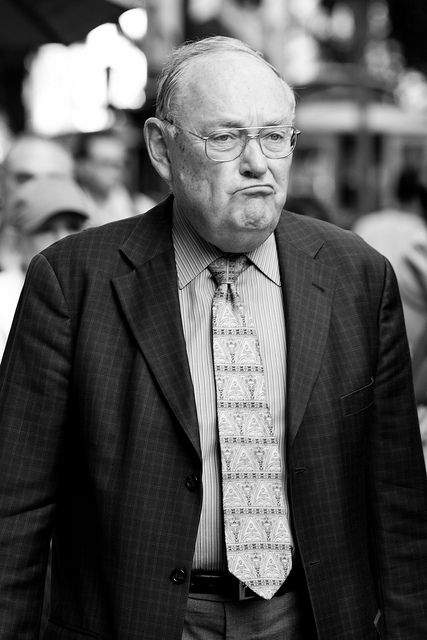

['judging from the dress was this taken in a latin american country', 'yes', 'COCO_train2014_000000524297.jpg']


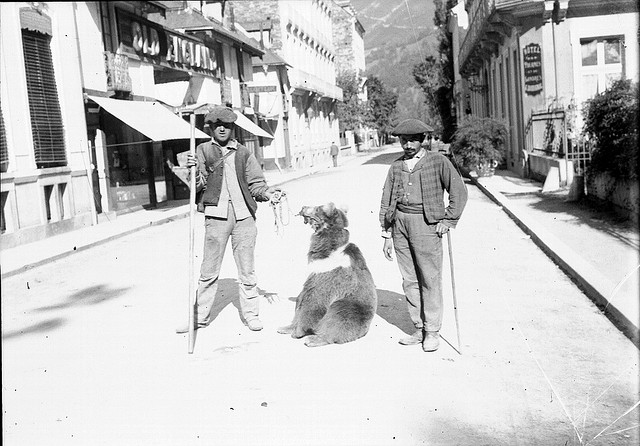

In [0]:
# with open('starter.csv') as csv_file:
#   csv_reader = csv.reader(csv_file, delimiter=',')
#   # for n in range(3):
#   image_path = random.choice(all_image_paths)
#   image_name = image_path.split('/')[-1]
  
#   print(image_path)
#   for row in csv_reader:
#     question, answer, image = row
#     if image_name == image:
#       print(image)
#       print(row)
#   display.display(display.Image(image_path))

starter = []
with open('starter.csv') as myfile:
  reader = csv.reader(myfile, delimiter=',')
  i = 0
  for row in reader:
    if i > 7 and i < 10:
      print(row)
      question, answer, image = row
      image = image.strip()
      path = os.path.join('/content/newzip/train2014', image)
      # starter.append(path)
      assert os.path.exists(path)
      image_path = path
      display.display(display.Image(image_path))
    i += 1
  # print(len(starter))  
    

### As a sanity check, verify you can locate all the images

In [0]:
with open('starter.csv') as myfile:
   reader = csv.reader(myfile, delimiter=',')
   for row in reader:
      question, answer, image = row
      image = image.strip()
      assert os.path.exists(os.path.join('/content/newzip/train2014', image))

###resize image 299*299

In [0]:
size = 299, 299
with open('starter.csv') as myfile:
  reader = csv.reader(myfile, delimiter=',')
  for row in reader:
    question, answer, image = row
    image = image.strip()
    path = os.path.join('/content/newzip/train2014', image)
    im = Image.open(image_path)
    im.thumbnail(size)
    out_file = os.path.join('/content/resize1', image)
    im.save(out_file, "JPEG")

In [0]:
import cv2

im = cv2.imread('/content/resize/COCO_train2014_000000393223.jpg')

print(im.shape)

(299, 224, 3)


###create a zip of resized image

In [0]:
shutil.make_archive('thumbnails', 'zip', '/content/resize1')

'/content/thumbnails.zip'

In [0]:
path = '/content/resize1'
print('filenum:',len([lists for lists in os.listdir(path) if os.path.isfile(os.path.join(path, lists))]))

filenum: 42985


In [0]:
total_size = os.path.getsize('/content/thumbnails.zip')
print('Drictory size: {:,} MB'.format(int(total_size/1024**2)).replace(',', ' '))

Drictory size: 581 MB
